# Assignment 1 - Question 1
### Anya P. Conti

## I. Coding
First we import in all the necessary libraries.  



In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.datasets import cifar10


tf.logging.set_verbosity(tf.logging.INFO)


Using TensorFlow backend.


After that, we load in the data set, and the training and test data and training and test labels to variables.  Then we check the shape of the data.  The labels are already in one-hot formatting, so these will not need to be changed.  

In [0]:
mnist=input_data.read_data_sets("mnist", one_hot=True)

training_set = mnist.train.images
training_labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_set = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

# Shapes of training set
print("Training set images shape: {shape}".format(shape=mnist.train.images.shape))
print("Training set labels shape: {shape}".format(shape=mnist.train.labels.shape))

# Shapes of test set
print("Test set images shape: {shape}".format(shape=mnist.test.images.shape))
print("Test set labels shape: {shape}".format(shape=mnist.test.labels.shape))


Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Training set images shape: (55000, 784)
Training set labels shape: (55000, 10)
Test set images shape: (10000, 784)
Test set labels shape: (10000, 10)


Next we set some variables, including creating a list for the values of the learning rates which will decay over time as a function of the previous learning rate and the current epoch.  

In [0]:
batchsize = 128
x_dim = 784
maxbatches = int(55000/batchsize)
epochs = 45
display_step = 5
lambdaparam = 0.01
lrstart = 0.001
lrarray = [0.001]

for i in range(0,epochs):
  newlr = lrarray[i]/math.sqrt(i+1)
  lrarray.append(newlr)
  
lrarray = lrarray[1:46]

Now we will create the network with all the specified characteristics, and run it 4 times - once with each of the 4 different optimizers: 

- Gradient descent pptimizer
- Adagrad optimizer
- Gradient descent with Nesterov’s momentum
- Adam optimizer

The average loss per epoch from each of these will be stored in a list.  

In [0]:
GradDescLoss = []
AdagradLoss = []
MomentLoss = []
AdamLoss = []

for i in range(0,4):
  if i == 0 :
    print("Gradient Descent Optimizer")
  elif i == 1:
    print("Adagrad Optimizer")
  elif i == 2:
    print("Momentum Optimizer")
  else:
    print("Adam Optimizer")
    
    
  with tf.variable_scope("main", reuse=tf.AUTO_REUSE):
    X = tf.placeholder(tf.float32, [55000, 784])
    Y = tf.placeholder(tf.float32, [55000, 10])
    Y_labels = tf.argmax(Y, axis = 1)
    W = tf.Variable(tf.zeros([784,10]))
    b = tf.Variable(tf.zeros([10]))
    declearningrate = tf.Variable(0.001)

    dataset = tf.data.Dataset.from_tensor_slices((X, Y_labels)).shuffle(maxbatches*batchsize, reshuffle_each_iteration = False).batch(batchsize)
    iteration = dataset.make_initializable_iterator()
    features, labels = iteration.get_next()




    outputs = tf.nn.softmax(tf.matmul(features,W) + b)
    regularizer = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=outputs) + lambdaparam * regularizer) 

    if i == 0 :
      optimizer = tf.train.GradientDescentOptimizer(learning_rate=declearningrate)
    elif i == 1:
      optimizer = tf.train.AdagradOptimizer(learning_rate=declearningrate)
    elif i == 2:
      optimizer = tf.train.MomentumOptimizer(learning_rate=declearningrate, momentum = 0.001, use_nesterov = True)
    else:
      optimizer = tf.train.AdamOptimizer(learning_rate=declearningrate)

    train_op = optimizer.minimize(loss)


  with tf.Session() as sess:



    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())

    for epoch in range(epochs):
      totalloss = 0
      sess.run([iteration.initializer, declearningrate.assign(lrarray[epoch])], feed_dict = {X: training_set, Y: training_labels})
      for j in range(maxbatches):
        _, c = sess.run([train_op, loss])
        totalloss += c 
      avgloss = totalloss / maxbatches
      if i == 0 :
        GradDescLoss.append(avgloss)
      elif i == 1:
        AdagradLoss.append(avgloss)
      elif i == 2:
        MomentLoss.append(avgloss)
      else:
        AdamLoss.append(avgloss)
      if (epoch + 1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avgloss))
    print("Optimization finished!")
  tf.reset_default_graph()



Gradient Descent Optimizer
Epoch: 0005 cost=2.290196577
Epoch: 0010 cost=2.289568916
Epoch: 0015 cost=2.289565766
Epoch: 0020 cost=2.289569699
Epoch: 0025 cost=2.289561248
Epoch: 0030 cost=2.289564519
Epoch: 0035 cost=2.289564295
Epoch: 0040 cost=2.289565609
Epoch: 0045 cost=2.289567184
Optimization finished!
Adagrad Optimizer
Epoch: 0005 cost=2.249697754
Epoch: 0010 cost=2.246864512
Epoch: 0015 cost=2.246854356
Epoch: 0020 cost=2.246863946
Epoch: 0025 cost=2.246852755
Epoch: 0030 cost=2.246832345
Epoch: 0035 cost=2.246888421
Epoch: 0040 cost=2.246832380
Epoch: 0045 cost=2.246861733
Optimization finished!
Momentum Optimizer
Epoch: 0005 cost=2.290180402
Epoch: 0010 cost=2.289557541
Epoch: 0015 cost=2.289553567
Epoch: 0020 cost=2.289550700
Epoch: 0025 cost=2.289548758
Epoch: 0030 cost=2.289552835
Epoch: 0035 cost=2.289553185
Epoch: 0040 cost=2.289552681
Epoch: 0045 cost=2.289551401
Optimization finished!
Adam Optimizer
Epoch: 0005 cost=1.815293095
Epoch: 0010 cost=1.814959451
Epoch: 0015

## II. Results

Now we can plot the data to compared each of the optimizers with each other.  This is shown in the graph below.  Adam seems to have the lowest loss by far, followed by Adagrad.  Gradient descent and gradint descent with Nesterov's momentum (referred to below as "Momentum Optimizer") are almost indistiguishable on the graph and have the highest loss, and the lowest decrease in loss from its initial value.  However, for all of them, they appear to drop by a certain amount at the very beginning, and then just plateau.  A higher amount of epochs does not improve the models.  

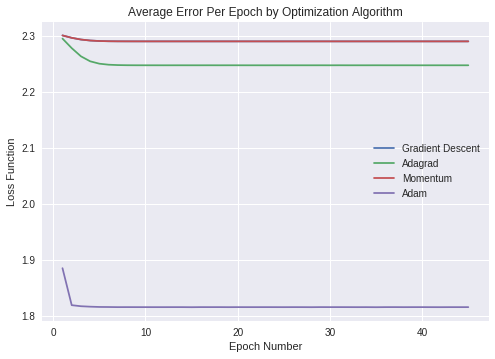

In [0]:
#Graph
plt.plot(np.arange(1., 46., 1.), GradDescLoss)
plt.plot(np.arange(1., 46., 1.), AdagradLoss)
plt.plot(np.arange(1., 46., 1.), MomentLoss)
plt.plot(np.arange(1., 46., 1.), AdamLoss)
plt.legend(["Gradient Descent", "Adagrad", "Momentum", "Adam"])
plt.title("Average Error Per Epoch by Optimization Algorithm")
plt.xlabel("Epoch Number")
plt.ylabel("Loss Function")
plt.show()